In [ ]:
#importing pandas library to create a dataframe
# importing numpy for creating matrices to perform mathematical operations which are fast in numpy like dot product
# imprting matplotlib for plotting dataset
#importing time to measure total program execution time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(12)
num_observations = 5000

In [ ]:
# creating random data for x1 and x2 features
x1 = np.random.multivariate_normal([0,0],[[1, .75],[.75,1]], num_observations)
x2 = np.random.multivariate_normal([1,4],[[1, .75],[.75,1]], num_observations)

In [ ]:
# merging features x1 and x1 into one array
features = np.vstack((x1,x2)).astype(np.float32)
# creating labels array of class +1 and -1
labels = np.hstack((np.full(num_observations, -1), np.ones(num_observations)))

In [ ]:
# shapes of features and labels
print(features.shape, labels.shape)

(10000, 2) (10000,)


In [ ]:
features

array([[-0.2015173 , -0.6833582 ],
       [ 0.37451947, -0.8280822 ],
       [-0.16189468, -1.2471066 ],
       ...,
       [ 2.3255963 ,  4.181329  ],
       [ 0.24707289,  4.2294044 ],
       [ 1.7190224 ,  4.8253503 ]], dtype=float32)

In [ ]:
labels

array([-1., -1., -1., ...,  1.,  1.,  1.])

          0         1  class
0 -0.201517 -0.683358   -1.0
1  0.374519 -0.828082   -1.0
2 -0.161895 -1.247107   -1.0
3  0.037711 -0.047303   -1.0
4 -0.260479  1.770204   -1.0


Text(0, 0.5, 'x2')

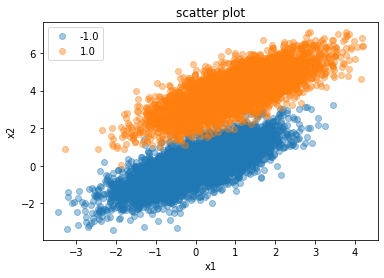

In [ ]:
# creating dataframe to join features and labels and generate plot
df=pd.DataFrame(features)
df['class']=labels
print(df.head())
# grouping data with class or label
groups = df.groupby("class")
for name, group in groups:
    plt.plot(group[0], group[1], marker="o", linestyle="", label=name, linewidth=0.4,alpha=0.4)
plt.legend()
plt.title('scatter plot')
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
# total data contains 10000 samples so here we split data with 80% for train and 20% for test with sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=1, train_size=0.80, test_size=0.20)

In [ ]:
# printing shapes of data 
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000, 2) (2000, 2)
(8000,) (2000,)


### ![image.png](attachment:image.png)

In [ ]:
# above image is the cost function
# cost function takes 3 parameters features, labels and weights and return the total cost
# goal of this function to reduce the cost and that depends on weights we get from gradient function
def cost_function(features, labels, weights):
    # performing dot product on features and weights to get f(x)
    f = np.dot(features, weights.T)
    # f(x) and -labels are multiplied and its result is passed to sigmoid function
    sigma = 1 + np.exp(-labels * f)
    # here we apply log function to handle extreme low values from sigma and sum them and finally divide with number of observations
    loss = sum(np.log(sigma))/features.shape[0]
    return loss

### ![image.png](attachment:image.png)

In [ ]:
# above image is gradient function
# gradient function the derivative of cost function which is used to find the optimal weight values
# it takes 3 parameters features, labels and weights and returns the gradient which has 2 or 3 weights in array for each row  
def cal_gradient(features, labels, weights):
    # first we calculate numerator by calculatig labels and features
    Num= labels * features.T
    # for denominator we need to find f(x) then multiply it with labels and the result is passed to sigmoid
    f = np.dot(features, weights.T)
    Den= 1+np.exp(labels * f)
    # now numerator and denominator is divided 
    gradient = np.divide(Num, Den).T
    # gradient is multiplied with negative sign and divided with number of observations
    gradient = -1/features.shape[0] * gradient
    return gradient

In [ ]:
# logistic regression function to generate optimal weights for the data to classify data linearly
# it takes 5 parameters features label, number of interations, neeta as learning rate and intercept whose default value is set as False
# this returns the optimal weights after all iterations 
def logistic_regression_PB(features, label, num_steps, learning_rate, bias=False):
    # here we initialize bias with if condition is true with all 1's as x3 in features and merge it with original features data passed
    if bias:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    # we initialize weights as many as number of features 
    weights = np.zeros(features.shape[1])
    # looping through iteration given
    for step in range(num_steps):
        # calling gradient functions which returns weights with or without bias for all rows
        gradient = cal_gradient(features, label, weights)
        # average gradient takes mean of all gradients and returns weights which has 3 have 3 values if bias is true or 2 values if false as w1 and w2
        avg_gradient = np.mean(gradient, axis=0)
        # now weights are updates by multiplying with learning rate and subtracting from previous weights
        weights -= learning_rate * avg_gradient
        # printing cost function and weights for every 1000 interations
        if step % 1000 == 0:
            print(cost_function(features, label, weights), weights)
    # finally optimal weights for given parameters are generated and returned
    return weights

In [ ]:
# sigmoid function to get values between 0 and 1 it takes f(x) as parameter which is dot product of weights and features
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [ ]:
# Below code is created for finding optimal parametrs to get best accuracy on model we created 
# this block is commented out because it take 9 min to execute to execute this just remove the quotes and run it 
# here we find best value of number of iterations, learning rate and intercept required to generate best accuracy
"""
list_steps=[1000, 5000, 10000, 20000, 30000]
list_rate=[0.00001, 0.0001, 0.001, 0.01, 0.1]
intercept=[True, False]
# creating a list to store parameters of model with best accuracy
final_vals=[]
# initializing accuracy variable
final_accuracy=0

for step in list_steps:
    for rate in list_rate:
        for b in intercept:
            # calling logistic function and get optimal weights for passed parametrs
            weights = logistic_regression_PB(X_train, y_train, step, rate, bias = b)
            # creating test fetaures and merging with x3 feature if bias is set to true
            X_test1 = X_test
            if b == True:
                bias1 = np.ones((X_test.shape[0], 1))
                X_test1 = np.hstack((bias1, X_test))
            # calculating f(x)
            scores = np.dot(X_test1, weights)
            scores= scores.reshape(X_test.shape[0],1)
            # calculating sigmoid to get values between 0 and 1
            scores1 = sigmoid(scores)
            # calculating predicted values of label or class with condition if sigmoid is less than 0.5 it is -1 and anything else will be +1
            preds=[]
            for i in scores1:
                if i < 0.5:
                    preds.append(-1)
                else:
                    preds.append(1)
            # creating list of actual values
            actual=list(y_test)
            # countimg total correct values
            count= sum(1 for i in range(len(actual)) if actual[i]==preds[i])
            # calculating accuracy
            accuracy = count / float(len(actual)) * 100.0
            # the following condition will be true only for 1st iteration 
            if final_accuracy==0:
                final_vals = [step, rate, weights]
                final_accuracy = accuracy
            # this condition is satisfied if on any parametrs acuuracy is improved then its parametrs and accuracy are stored 
            if accuracy > final_accuracy:
                final_vals = [step, rate, weights]
                final_accuracy = accuracy
            print()
"""

'\nlist_steps=[1000, 5000, 10000, 20000, 30000]\nlist_rate=[0.00001, 0.0001, 0.001, 0.01, 0.1]\nintercept=[True, False]\n# creating a list to store parameters of model with best accuracy\nfinal_vals=[]\n# initializing accuracy variable\nfinal_accuracy=0\n\nfor step in list_steps:\n    for rate in list_rate:\n        for b in intercept:\n            # calling logistic function and get optimal weights for passed parametrs\n            weights = logistic_regression_PB(X_train, y_train, step, rate, bias = b)\n            # creating test fetaures and merging with x3 feature if bias is set to true\n            X_test1 = X_test\n            if b == True:\n                bias1 = np.ones((X_test.shape[0], 1))\n                X_test1 = np.hstack((bias1, X_test))\n            # calculating f(x)\n            scores = np.dot(X_test1, weights)\n            scores= scores.reshape(X_test.shape[0],1)\n            # calculating sigmoid to get values between 0 and 1\n            scores1 = sigmoid(score

In [ ]:
"""
# above commented block results can be printed with this print statment
print(final_vals, final_accuracy)
num_steps =final_vals[0]
learning_rate = final_vals[1]
b=True
if len(final_vals[2])==2:
    b = False
else:
    b = True
weights = logistic_regression_PB(X_train, y_train,num_steps, learning_rate, bias = b)
"""

'\n# above commented block results can be printed with this print statment\nprint(final_vals, final_accuracy)\nnum_steps =final_vals[0]\nlearning_rate = final_vals[1]\nb=True\nif len(final_vals[2])==2:\n    b = False\nelse:\n    b = True\nweights = logistic_regression_PB(X_train, y_train,num_steps, learning_rate, bias = b)\n'

### running above code gives us this results :
### [30000, 0.1, array([-0.02535993,  0.0547477 ,  0.25584046])] 75.64999999999999
### here number iteration are 30000, learning rate 0.1, and weights with intercept as [-0.02535993,  0.0547477 ,  0.25584046])]  and accuracy of 75.649

In [ ]:
# the resulting parametrs accuracy can be verified with below written code
num_steps = 30000
learning_rate = 0.1
b=True
weights = logistic_regression_PB(X_train, y_train,num_steps, learning_rate, bias = b)

0.6931337206415793 [3.28125000e-08 3.12231302e-06 1.25897449e-05]
0.680083146349457 [-8.85197818e-06  3.06435509e-03  1.24121779e-02]
0.667815241772473 [-9.91089364e-05  6.00628296e-03  2.44402824e-02]
0.6562789533135867 [-0.00026782  0.00883305  0.03610968]
0.6454256676087143 [-0.00051205  0.01154882  0.0474332 ]
0.6352093332931575 [-0.0008289   0.01415776  0.0584236 ]
0.6255865193501472 [-0.00121551  0.01666398  0.0690935 ]
0.616516421477633 [-0.00166908  0.01907153  0.07945531]
0.6079608270538884 [-0.00218685  0.02138437  0.08952115]
0.5998840481637344 [-0.00276617  0.02360636  0.09930282]
0.592252830908218 [-0.00340444  0.02574123  0.10881174]
0.5850362479670558 [-0.00409918  0.02779259  0.11805898]
0.5782055801862247 [-0.00484799  0.02976393  0.1270552 ]
0.5717341918679637 [-0.00564854  0.03165858  0.13581062]
0.5655974034697947 [-0.00649862  0.03347977  0.1443351 ]
0.5597723645817023 [-0.00739612  0.03523055  0.15263803]
0.5542379293434073 [-0.00833899  0.03691386  0.16072843]
0.

In [ ]:
# creating test fetaures and merging with x3 feature if bias is set to true
X_test1 = X_test
if b:
    bias1 = np.ones((X_test.shape[0], 1))
    X_test1 = np.hstack((bias1, X_test))
# calculating f(x)
scores = np.dot(X_test1, weights.T)
scores= scores.reshape(X_test.shape[0],1)
# calculating sigmoid to get values between 0 and 1
scores1 = sigmoid(scores)
# calculating predicted values of label or class with condition if sigmoid is less than 0.5 it is -1 and anything else will be +1
preds=[]
for i in scores1:
    if i < 0.5:
        preds.append(-1)
    else:
        preds.append(1)


In [ ]:
# creating list of actual values
actual=list(y_test)
# calculating count for correctly predicted values with actual values
count= sum(1 for i in range(len(actual)) if actual[i]==preds[i])
# calculating accuracy
accuracy = count / float(len(actual)) * 100.0
print("logistic from scratch Test Accuracy is: %.2f percent!" %accuracy )


logistic from scratch Test Accuracy is: 75.65 percent!


In [ ]:
# importing logistic regression model from sklearn to comapre results or accuracy
from sklearn.linear_model import LogisticRegression
# using gridsearchcv to find optimal parametrs for model to get best accuracy
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# list of grid parameters
grid={"C":[0.00001, 0.0001, 0.001, 0.01, 0.1], "fit_intercept":['True', 'False'],"max_iter":[1000, 5000, 10000, 20000, 30000]}
# creating model with liblinear solver
logreg=LogisticRegression(solver='liblinear')
# creating gridsearch cv with 10 cross fold validations 
logreg_cv=GridSearchCV(logreg,grid,cv=10)
# fitting the train data to model
logreg_cv.fit(X_train,y_train)

# print best parametrs of the model
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# printing test data score of sklearn logistic regression model
print("sklearn logistic regression accuracy :",logreg_cv.score(X_test,y_test))
# printing coeffients and intercept of the model
print("sklearn logistic regression weights and intercept :",logreg_cv.best_estimator_.coef_,logreg_cv.best_estimator_.intercept_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'fit_intercept': 'True', 'max_iter': 1000}
sklearn logistic regression accuracy : 0.994
sklearn logistic regression weights and intercept : [[-1.7782063   3.18227741]] [-5.16363496]


### Here the sklearn model with all possible parameters gave best accuracy of 99.4% with learning rate 0.1, number of iterations as 1000 and with bias

In [ ]:
# here we test simple logistic regression model with the best parameters we got from scratch logistic regression
logreg=LogisticRegression(C=0.1, max_iter=30000, fit_intercept= True,solver='liblinear')
# fitting train data
logreg.fit(X_train,y_train)

# printing test data accuracy, weights and intercept
print("sklearn logistic regression accuracy :",logreg_cv.score(X_test,y_test))
print("sklearn logistic regression weights and intercept :",logreg.coef_,logreg.intercept_)

sklearn logistic regression accuracy : 0.994
sklearn logistic regression weights and intercept : [[-1.7782063   3.18227741]] [-5.16363496]


### the same sklearn model was tested on parametrs generated by srcatch model and results were different as weights and intercept was different as accuracy was better

In [ ]:
# printing accuracy, weights and intercept of logistric regtression from scrach model
print("logistic from scratch Test Accuracy is: %.2f percent!" %accuracy )
print("Logistic regression scratch weights and intercept :",weights)

logistic from scratch Test Accuracy is: 75.65 percent!
Logistic regression scratch weights and intercept : [-0.02535993  0.0547477   0.25584046]


### The accuracy of our Scratch logistic regression model is printed above to compare with sklearns and its weights too. Finally it can be concluded that our model did not perform better or equal to sklearn's.

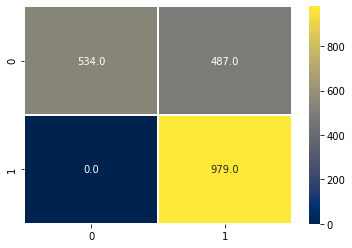

In [ ]:
# creating a confution matrix with heatmap
import seaborn as sn
# importing confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
# matrix is created by comparing actual and predicted values
cm=confusion_matrix(actual,preds)
sn.heatmap(cm, annot=True, linewidths=.5, cmap="cividis",fmt=".1f")

### The matrix shows that True Negatives gave high accuracy of almost 98%, False Negative were negligible and True Positives were predicted with almost 53% accuracy and False Positives had almost 49% percent accuracy which is not good. This means only negative class had better prediction in the model we created from scratch